In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential  # Build NN
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv("/content/update_temperature.csv")
df.head()

,Year,Country,AvgTemperature C,CO2Emissions(tonspercapita),SeaLevelRise mm,Rainfall mm,Population,RenewableEnergy %,ExtremeWeatherEvents,Forest_Area %
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         156 non-null    int64  
 1   Country                      156 non-null    object 
 2   AvgTemperature C             156 non-null    float64
 3   CO2Emissions(tonspercapita)  156 non-null    float64
 4   SeaLevelRise mm              156 non-null    int64  
 5   Rainfall mm                  156 non-null    int64  
 6   Population                   156 non-null    int64  
 7   RenewableEnergy %            156 non-null    float64
 8   ExtremeWeatherEvents         156 non-null    int64  
 9   Forest_Area %                156 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 12.3+ KB


In [ ]:
df.isnull().sum()

,0
Year,0
Country,0
AvgTemperature C,0
CO2Emissions(tonspercapita),0
SeaLevelRise mm,0
Rainfall mm,0
Population,0
RenewableEnergy %,0
ExtremeWeatherEvents,0
Forest_Area %,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df.head()

,Country,AvgTemperature C,CO2Emissions(tonspercapita),SeaLevelRise mm,Rainfall mm,Population,RenewableEnergy %,ExtremeWeatherEvents,Forest_Area %
0,18,13.5,20.2,0,715,282500000,6.2,38,33.1
1,3,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,5,9.3,10.1,0,700,82200000,6.6,12,31.8
3,1,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,0,21.7,17.2,0,534,19200000,8.8,11,16.2


In [ ]:
label_encoder.classes_

array(['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany',
       'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Nigeria',
       'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain',
       'United Kingdom', 'United States'], dtype=object)

[]

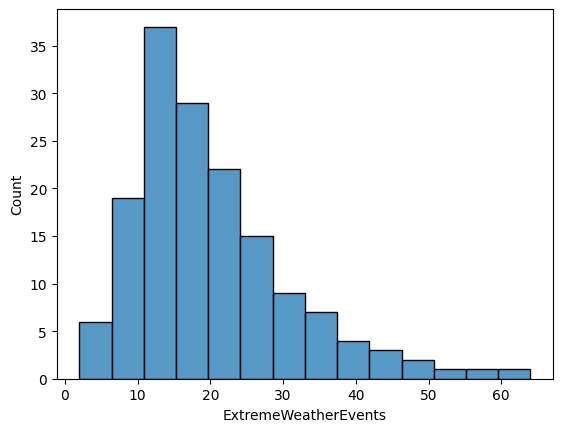

In [ ]:
sns.histplot(df["ExtremeWeatherEvents"])
plt.plot()

In [ ]:
df.drop(columns = ["Year"] , inplace = True)

In [ ]:
df.head()

,Country,AvgTemperature C,CO2Emissions(tonspercapita),SeaLevelRise mm,Rainfall mm,Population,RenewableEnergy %,ExtremeWeatherEvents,Forest_Area %
0,18,13.5,20.2,0,715,282500000,6.2,38,33.1
1,3,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,5,9.3,10.1,0,700,82200000,6.6,12,31.8
3,1,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,0,21.7,17.2,0,534,19200000,8.8,11,16.2


In [ ]:
x = df.drop(columns = ["ExtremeWeatherEvents"])
y = df["ExtremeWeatherEvents"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 3.496808095388911
Mean Squared Error: 25.885273217393937
R-squared Score: 0.765194222766028


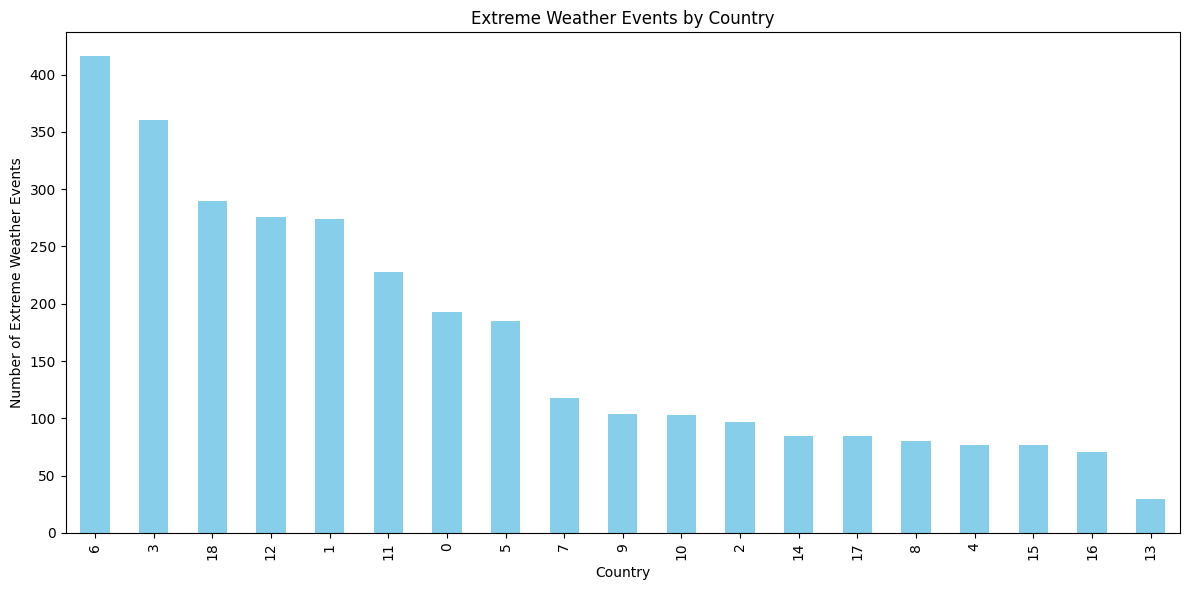

In [ ]:
country_events = df.groupby('Country')['ExtremeWeatherEvents'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_events.plot(kind='bar', color='skyblue')
plt.title('Extreme Weather Events by Country')
plt.xlabel('Country')
plt.ylabel('Number of Extreme Weather Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()